# Clifford Randomized Benchmarking (RB) Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#### Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

# Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [4]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

In [5]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,1],[3,4]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(6)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

# Run the experiment

In [6]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

2024-12-16 16:10:56,441 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2024-12-16 16:10:56,442 - iqm.benchmarks.logging_config - INFO - Executing sequential Clifford RB on qubits [0, 1]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63]
2024-12-16 16:10:56,442 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2024-12-16 16:10:56,526 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2024-12-16 16:10:56,690 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2024-12-16 16:10:57,042 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2024-12-16 16:10:57,720 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2024-12-16 16:10:59,106 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2024-12-16 16:11:07,616 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1]
2024-12-16

# Perform the analysis

In [7]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2024-12-16 16:11:24,930 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[0, 1], [3, 4]]
2024-12-16 16:11:24,938 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 1
2024-12-16 16:11:24,945 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 3
2024-12-16 16:11:24,952 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 7
2024-12-16 16:11:24,959 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 15
2024-12-16 16:11:24,966 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 31
2024-12-16 16:11:24,973 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 63
2024-12-16 16:11:24,980 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 1
2024-12-16 16:11:24,987 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 3
2024-12-16 16:11:24,994 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 7
2024-12-16 16:11:25,001 - iqm.benchmarks.logging_config

{'clifford': {'[0, 1]': 0.9491311120193526}}
[0, 1]
clifford
{'clifford': {'[3, 4]': 0.9491311120193526}}
[3, 4]
clifford


In [8]:
run_clifford_rb.dataset.attrs

{'session_timestamp': '20241216-161051',
 'execution_timestamp': '20241216-161051',
 'backend_configuration_name': 'fakeapollo',
 'backend_name': 'IQMFakeApolloBackend',
 'benchmark': 'clifford_rb',
 'shots': 256,
 'max_gates_per_batch': None,
 'calset_id': None,
 'routing_method': 'sabre',
 'physical_layout': 'fixed',
 'qubits_array': [[0, 1], [3, 4]],
 'sequence_lengths': [1, 3, 7, 15, 31, 63],
 'num_circuit_samples': 25,
 'parallel_execution': False,
 0: {'qubits': [0, 1],
  'depth_1': {'time_circuit_generation': 11.174190044403076,
   'time_submit': 0.007189035415649414,
   'time_retrieve': 0.0245511531829834,
   'all_job_metadata': {'batch_job_1': {'job_id': 'd925ea4e-6ea1-49ff-a5b9-ffccfb8713ad',
     'backend': 'aer_simulator',
     'status': 'job has successfully run',
     'circuits_in_batch': None,
     'shots': None,
     'timestamps': None}}},
  'depth_3': {'time_circuit_generation': 11.174190044403076,
   'time_submit': 0.0366971492767334,
   'time_retrieve': 0.00061631202

In [9]:
result_clifford_rb.observations

[BenchmarkObservation(name='avg_gate_fidelity', value=0.9491311120193526, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1]), uncertainty=0.001864917766369288),
 BenchmarkObservation(name='avg_gate_fidelity', value=0.9456432355319344, identifier=BenchmarkObservationIdentifier(qubit_indices=[3, 4]), uncertainty=0.0006300966706368575)]

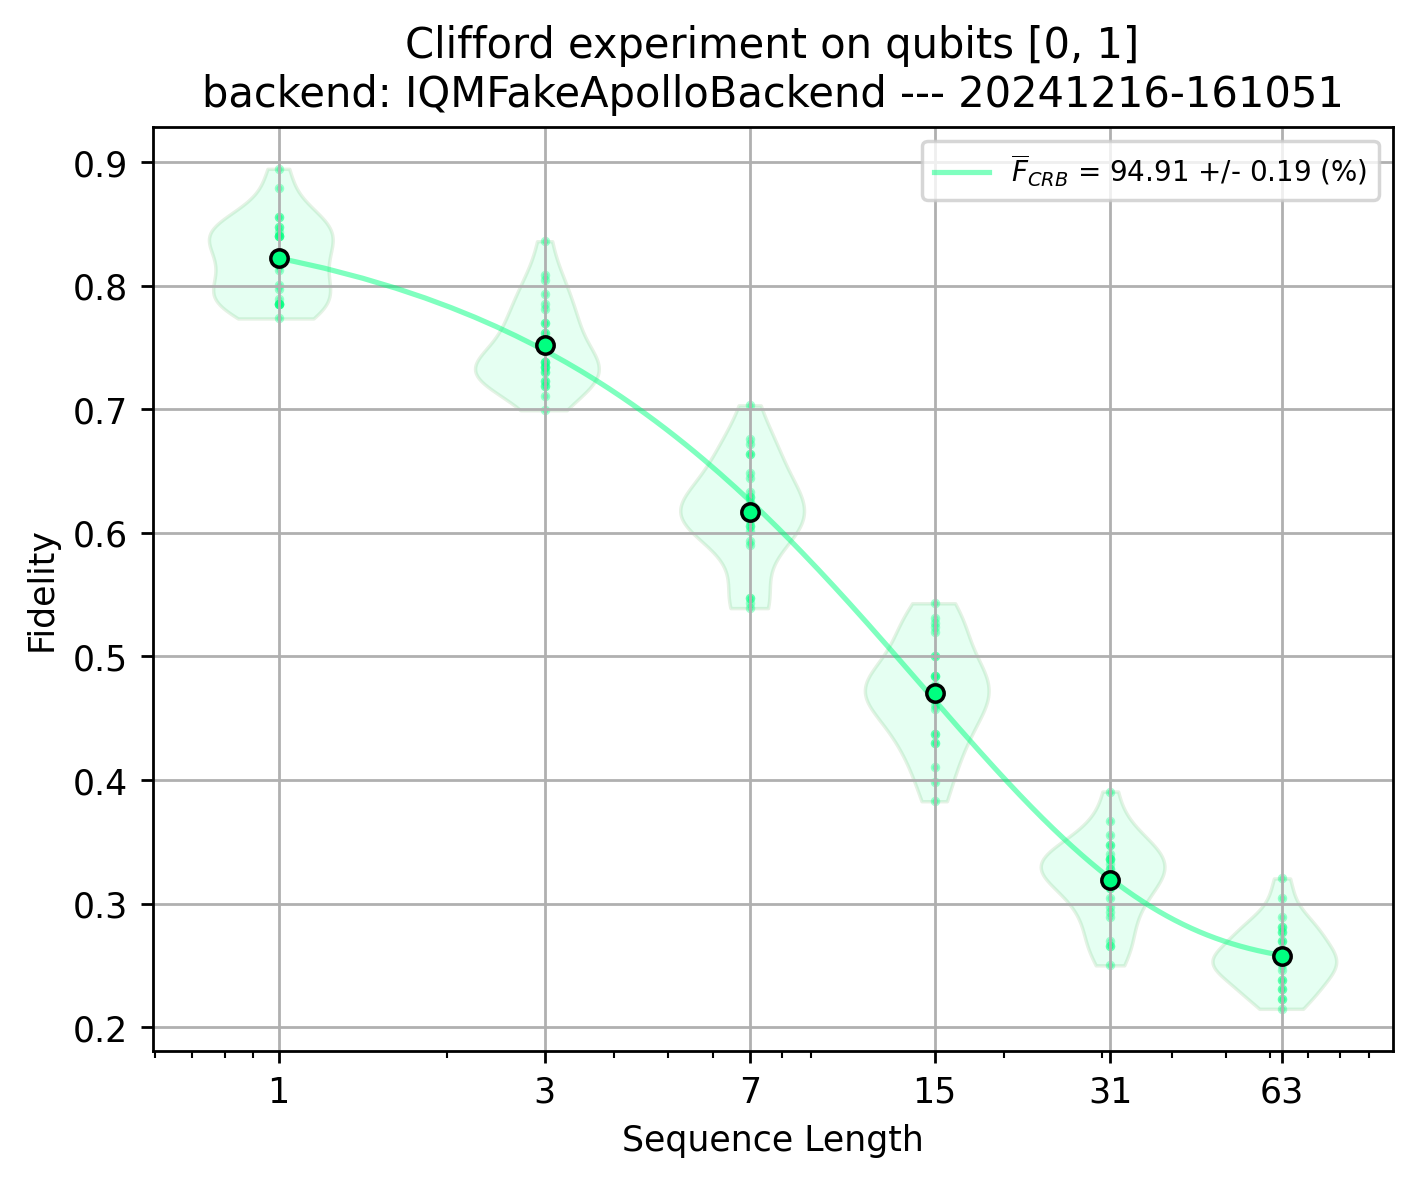

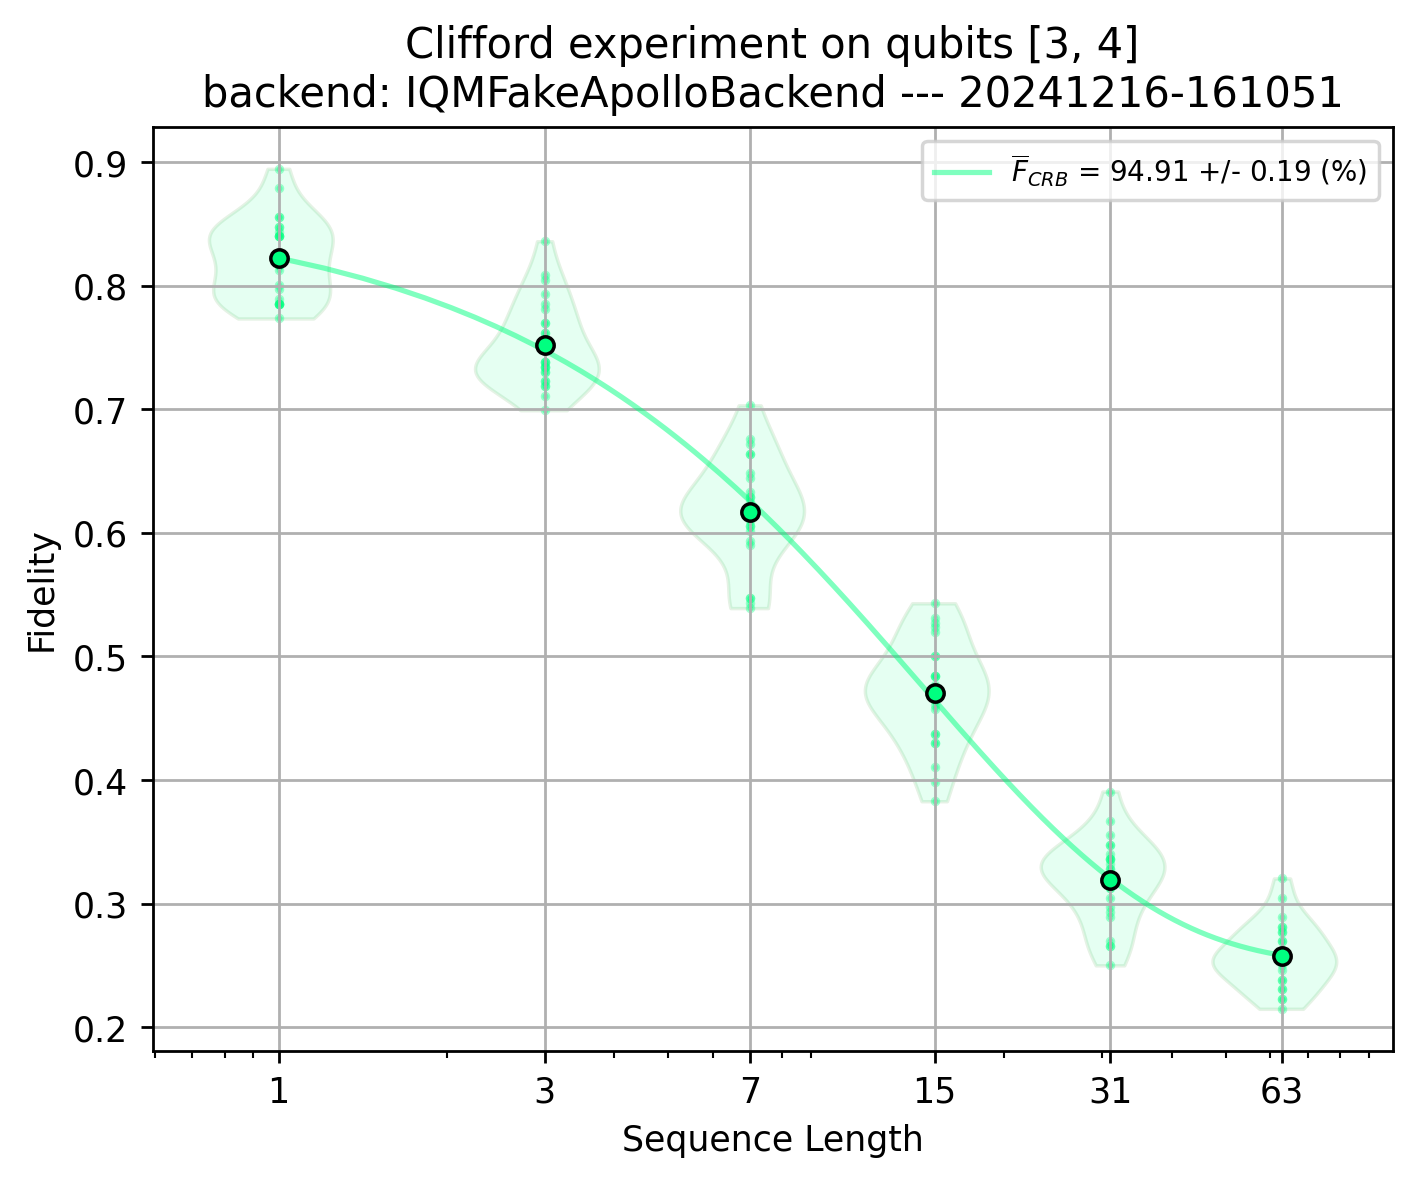

In [10]:
for plot in result_clifford_rb.plots.values():
    display(plot)